In [47]:
# IMPORTS #
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import pyplot
%matplotlib inline
import seaborn as sns
sns.set_style('darkgrid')
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict, GridSearchCV,RepeatedKFold
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.metrics import mean_squared_error
from sklearn.svm import SVR
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor, ExtraTreesRegressor
# from pandas_profiling import ProfileReport
from sklearn.pipeline import make_pipeline
import xgboost as xgb
import pickle
# import os

# Data import/Manipulation 

In [2]:
# Cleaned dataset of MyAnimeList.net of popular anime

# exporting csv file to a DataFrame only using columns listed
df = pd.read_csv("data/final_df.csv", usecols=['title','type','source','episodes','rating', 'score', 'scored_by','rank','popularity','members', 'favorites','duration_min','aired_from_year'])
# df_number_set = pd.read_csv("data/anime_cleaned.csv", usecols=['episodes', 'score', 'scored_by','rank','popularity','members', 'favorites','duration_min','aired_from_year'])
display(df)
# display(df_number_set)

,title,type,source,episodes,rating,score,scored_by,rank,popularity,members,favorites,duration_min,aired_from_year
0,Inu x Boku SS,5,6,12,3,7.63,139250,1274,231,283882,2809,24.0,2012
1,Seto no Hanayome,5,6,26,3,7.89,91206,727,366,204003,2579,24.0,2007
2,Shugo Chara!! Doki,5,6,51,2,7.55,37129,1508,1173,70127,802,24.0,2008
3,Princess Tutu,5,9,38,3,8.21,36501,307,916,93312,3344,16.0,2002
4,Bakuman. 3rd Season,5,6,25,3,8.67,107767,50,426,182765,2082,24.0,2012
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6307,Ling Yu 4th Season,2,8,12,3,7.53,17,11126,12779,126,0,13.0,2016
6308,Wo Shi Jiang Xiaobai (2018),2,9,1,3,0.00,0,12719,10168,384,1,0.0,2018
6309,Genki Genki Non-tan: Obake Mura Meiro,3,9,1,0,4.20,5,10253,14257,37,0,35.0,2015
6310,Mr. Men Little Miss,2,11,0,0,4.57,7,11396,14066,49,1,2.0,2013


# Multiple Linear Regression

In [3]:
X = df.drop(['title','score'],axis=1)
y = df['score']

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=3)


In [4]:
def multi_linear_regression_modeling(independent_variable,dependent_variable):
    #  fitting the independent variable(X) and the dependent variable(Y) to Linear Regression object (for easier calling)
    globals () ['mlr'] = LinearRegression().fit(independent_variable,dependent_variable)
    # assigning predictions to global variable (Yhat_mlr) to be called outside of function, using independent variable(X)
    globals() ['Yhat_mlr'] = mlr.predict(independent_variable)
    globals() ['columns_used'] = [independent_variable.columns[i] for i,value in enumerate(independent_variable.columns)]
    
    ##     𝑌ℎ𝑎𝑡 = 𝑎 + 𝑏1 𝑋1 + 𝑏2 𝑋2 +𝑏3 𝑋3 + 𝑏4 𝑋4 ...     ##
    # intercept (a)
    print(f'The intercept of the regression line is {mlr.intercept_}')
    # slope (b)
    print(f'The slopes of the regression line is {mlr.coef_}')
    print('\n\033[1m    𝑌ℎ𝑎𝑡 = 𝑎 + 𝑏1 𝑋1 + 𝑏2 𝑋2 +𝑏3 𝑋3 + ... \nPlugging in the actual values the multiple linear regression formula:\033[0m')
    
    
    # printing the multiple linear regression formula with variables plugged in
    formula = (f'\033[1m{dependent_variable.name}\033[0m = {mlr.intercept_}')
    for i,col in enumerate(independent_variable.columns):
        slope_times_feature = f' + ({mlr.coef_[i]} * \033[1m{independent_variable.columns[i]}\033[0m)'
        formula += str(slope_times_feature)
    print(formula)   
    
    globals() ['r_square'] = mlr.score(independent_variable,dependent_variable)
    print(f'\n\n\033[1mThe R-square is: {r_square}\033[0m')
    print(f'We can say that \033[1m~{round(r_square*100,2)}%\033[0m of the variation of the {dependent_variable.name} is explained by this multiple linear model fitted with \033[1m{columns_used}\033[0m.\n')
    globals() ['mse'] = mean_squared_error(dependent_variable, Yhat_mlr)
    print(f'\033[1mThe mean square error of price and predicted values is: \033[0m', mse)
    
    
    plt.figure(figsize=(12, 10))
    ax1 = sns.distplot(dependent_variable, hist=False, color="r", label="Actual Value")
    sns.distplot(Yhat_mlr, hist=False, color="b", label="Fitted Values" , ax=ax1)


    plt.title(f'Actual vs Fitted Values for {dependent_variable.name.title()}')
    plt.xlabel(dependent_variable.name.title())
    plt.ylabel('Proportion of Anime')

    plt.show()
    plt.close()

The intercept of the regression line is 8.472626735946417
The slopes of the regression line is [ 1.71221826e-02 -1.97923941e-03  4.22802868e-04 -7.20841353e-03
 -2.77511937e-06 -2.59717588e-04  1.18190282e-05  2.08786579e-06
  9.37245504e-06  2.59293559e-03 -3.41625913e-04]

    𝑌ℎ𝑎𝑡 = 𝑎 + 𝑏1 𝑋1 + 𝑏2 𝑋2 +𝑏3 𝑋3 + ... 
Plugging in the actual values the multiple linear regression formula:
score = 8.472626735946417 + (0.017122182589355366 * type) + (-0.0019792394057776713 * source) + (0.00042280286812454925 * episodes) + (-0.007208413532651243 * rating) + (-2.775119373362323e-06 * scored_by) + (-0.0002597175883979299 * rank) + (1.181902819069742e-05 * popularity) + (2.0878657896962385e-06 * members) + (9.37245504298063e-06 * favorites) + (0.0025929355949963796 * duration_min) + (-0.00034162591310092687 * aired_from_year)


The R-square is: 0.8184635508102259
We can say that ~81.85% of the variation of the score is explained by this multiple linear model fitted with ['type', 'source', 'epis

C:\Users\sdman\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\sdman\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


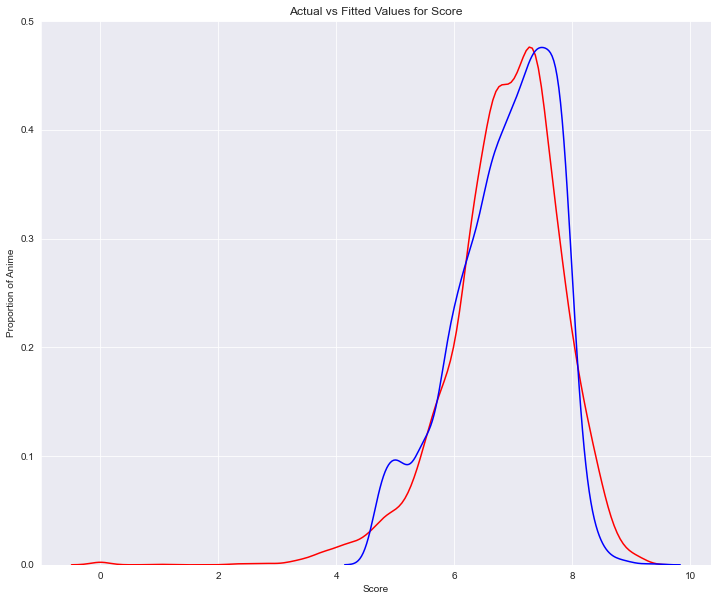

In [5]:
multi_linear_regression_modeling(X, y)

In [6]:
# function for multiple linear regression with cross validation

def cv_multi_linear_regression_modeling(independent_variable,dependent_variable,folds):
    globals () ['X_train', 'X_test', 'y_train', 'y_test'] = train_test_split(independent_variable,dependent_variable,test_size=0.3, random_state=3)
   
    globals() ['columns_used'] = [independent_variable.columns[i] for i,value in enumerate(independent_variable.columns)]
    # fitting the independent variable(X) and the dependent variable(Y) to Linear Regression object (for easier calling)
    globals () ['mlr'] = LinearRegression()
    
    # assigning predictions to global variable (Yhat_mlr_cv) to be called outside of function, using X_train
    globals() ['Yhat_mlr_cv'] = cross_val_predict(mlr, X_train,y_train, cv = folds)
    
    # gets cross validation R^2 score 
    def get_cv_scores(model,folds):
        globals() ['cv_scores'] = cross_val_score(model,
                                                  X_train, 
                                                  y_train,
                                                  cv=folds,
                                                  scoring='r2')
    get_cv_scores(mlr,folds)
  
    globals() ['CV_r_square'] = np.mean(cv_scores)
    print(f'\n\n\033[1mThe Avg cross validation R-square (with {folds} folds) is: {CV_r_square}\033[0m')
    globals() ['STD'] = np.std(cv_scores)
    print(f'\n\033[1mWith a Standard Diviation of the R-squares: {STD}\n\033[0m')

    print(f'We can say that \033[1m~{round(CV_r_square*100,2)}%\033[0m of the variation of the {dependent_variable.name} is explained by this multiple linear model fitted with \033[1m{columns_used}\033[0m.\n')
    globals() ['mse'] = mean_squared_error(y_train, Yhat_mlr_cv)
    print(f'\033[1mThe mean square error of predicted values is: \033[0m', mse)
    
    
    mlr.fit(X_train,y_train)
    y_hat = mlr.predict(X_test)      #this gives me my predictions

    print(f"\nThe model's performance score is {mlr.score(X_test, y_test)}")     #this tells me my model performance

    
    ##     𝑌ℎ𝑎𝑡 = 𝑎 + 𝑏1 𝑋1 + 𝑏2 𝑋2 +𝑏3 𝑋3 + ... + 𝑏n 𝑋n    ##
    # intercept (a)
    print(f'\n\nThe intercept of the regression line is {mlr.intercept_}')
    # slope (b)
    print(f'The slopes of the regression line are {mlr.coef_}')
    print('\n\033[1m    𝑌ℎ𝑎𝑡 = 𝑎 + 𝑏1 𝑋1 + 𝑏2 𝑋2 +𝑏3 𝑋3 + ... + 𝑏n 𝑋n \nPlugging in the actual values the multiple linear regression formula:\033[0m')
    
    # printing the multiple linear regression formula with variables plugged in 
    formula = (f'\033[1m[{dependent_variable.name.upper()}]\033[0m = {mlr.intercept_}')
    for i,col in enumerate(independent_variable.columns):
        slope_times_feature = f' + ({mlr.coef_[i]} * \033[1m{independent_variable.columns[i]}\033[0m)'
        formula += str(slope_times_feature)
    print(formula) 
  
    #plotting differences betwwen actual and predicted values
    
    plt.figure(figsize=(12, 10))
    #plotting actual target values
    ax1 = sns.distplot(dependent_variable, hist=False, color="r", label="Actual Value")
    #plotting predicted target values
    sns.distplot(Yhat_mlr_cv, hist=False, color="b", label="Cross Validation Fitted Values" , ax=ax1)
    sns.distplot(y_hat, hist=False, color="m", label="Fitted Values" , ax=ax1)
    
    plt.title(f'Actual vs Fitted Values for {dependent_variable.name.title()}')
    plt.xlabel(dependent_variable.name.title())
    plt.ylabel('Proportion based on total count')
    plt.show()
    plt.close()
    
  



The Avg cross validation R-square (with 5 folds) is: 0.8200950165333447

With a Standard Diviation of the R-squares: 0.035672098507032964

We can say that ~82.01% of the variation of the score is explained by this multiple linear model fitted with ['type', 'source', 'episodes', 'rating', 'scored_by', 'rank', 'popularity', 'members', 'favorites', 'duration_min', 'aired_from_year'].

The mean square error of predicted values is:  0.16348931643629774

The model's performance score is 0.8074600711513487


The intercept of the regression line is 6.876735224810318
The slopes of the regression line are [ 8.81183037e-03 -2.55348710e-03  1.75131774e-03 -2.13228266e-03
 -2.89433605e-06 -2.59667776e-04  9.85415018e-06  2.06741877e-06
  9.92708478e-06  2.37689537e-03  4.62591015e-04]

    𝑌ℎ𝑎𝑡 = 𝑎 + 𝑏1 𝑋1 + 𝑏2 𝑋2 +𝑏3 𝑋3 + ... + 𝑏n 𝑋n 
Plugging in the actual values the multiple linear regression formula:
[SCORE] = 6.876735224810318 + (0.008811830374225999 * type) + (-0.0025534871023362585 * sourc

C:\Users\sdman\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\sdman\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\sdman\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdep

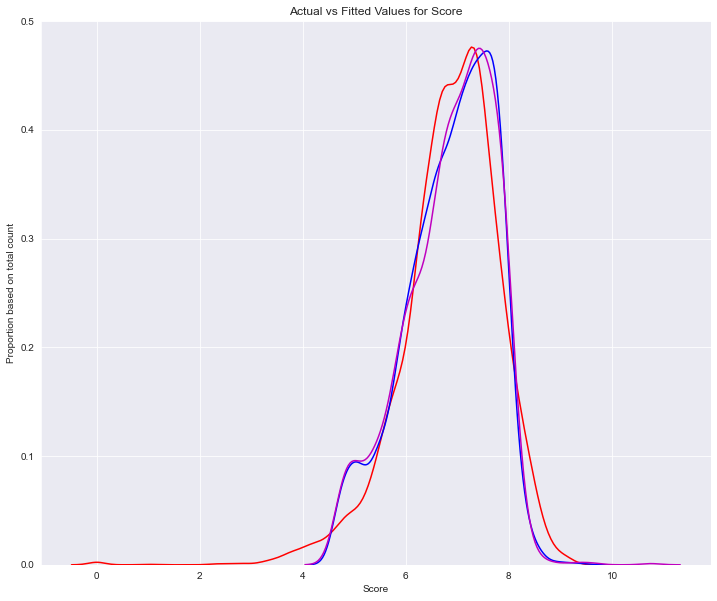

In [7]:
cv_multi_linear_regression_modeling(X, y, 5)

R-square is: 0.8183936035825073
mean square error is:  0.16209149042806653



The Avg cross validation R-square (with 50 folds) is: 0.8260895040316656

With a Standard Diviation of the R-squares: 0.08583498510437472

We can say that ~82.61% of the variation of the score is explained by this multiple linear model fitted with ['type', 'source', 'episodes', 'rating', 'scored_by', 'rank', 'popularity', 'members', 'favorites', 'duration_min', 'aired_from_year'].

The mean square error of predicted values is:  0.1634082052753683

The model's performance score is 0.8074600711513487


The intercept of the regression line is 6.876735224810318
The slopes of the regression line are [ 8.81183037e-03 -2.55348710e-03  1.75131774e-03 -2.13228266e-03
 -2.89433605e-06 -2.59667776e-04  9.85415018e-06  2.06741877e-06
  9.92708478e-06  2.37689537e-03  4.62591015e-04]

    𝑌ℎ𝑎𝑡 = 𝑎 + 𝑏1 𝑋1 + 𝑏2 𝑋2 +𝑏3 𝑋3 + ... + 𝑏n 𝑋n 
Plugging in the actual values the multiple linear regression formula:
[SCORE] = 6.876735224810318 + (0.008811830374225999 * type) + (-0.0025534871023362585 * source

C:\Users\sdman\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\sdman\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\sdman\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdep

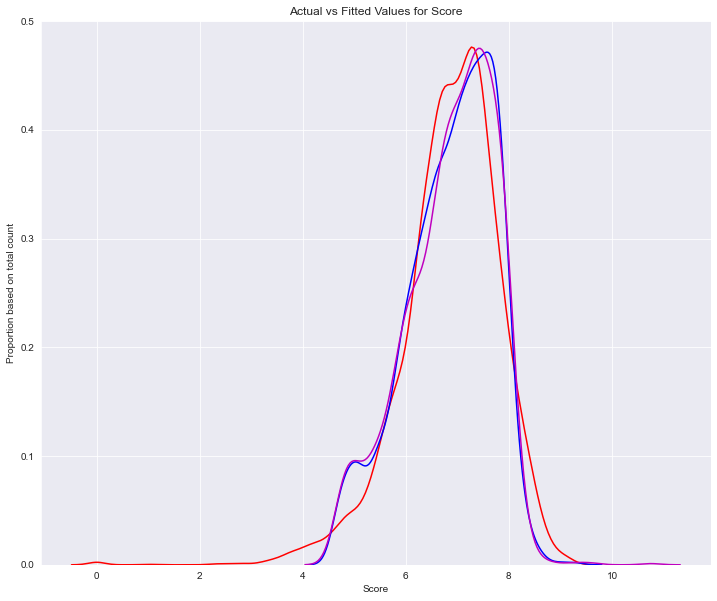

In [8]:
cv_multi_linear_regression_modeling(X, y,50)

In [9]:
coeff = pd.DataFrame()
coeff["Columns"] = X_train.columns
coeff["Linear_Regession_Coefficients"] = pd.Series(mlr.coef_)
coeff

,Columns,Linear_Regession_Coefficients
0,type,0.008812
1,source,-0.002553
2,episodes,0.001751
3,rating,-0.002132
4,scored_by,-0.000003
5,rank,-0.000260
6,popularity,0.000010
7,members,0.000002
8,favorites,0.000010
9,duration_min,0.002377


# GridSearch 

## Ridge Regression GridSearch

In [10]:
# find optimal parameters with grid search

space = dict()
space['solver'] = ['svd', 'cholesky', 'lsqr', 'sag']
space['alpha'] = [0.00001, 0.0001, 0.001, 0.01, 0.1, 1, 10, 100,1000,10000]
space['fit_intercept'] = [True, False]
space['normalize'] = [True, False]
grid_rr = GridSearchCV(Ridge(random_state=3), space, scoring='r2', verbose=1, n_jobs=-1,cv=50)
grid_result_rr = grid_rr.fit(X_train, y_train)
print('Best Score: ', grid_result_rr.best_score_)
print('Best Params: ', grid_result_rr.best_params_)

Fitting 50 folds for each of 160 candidates, totalling 8000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    5.8s
[Parallel(n_jobs=-1)]: Done 668 tasks      | elapsed:   14.0s
[Parallel(n_jobs=-1)]: Done 1417 tasks      | elapsed:   44.9s
[Parallel(n_jobs=-1)]: Done 2435 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 4029 tasks      | elapsed:  2.3min
[Parallel(n_jobs=-1)]: Done 5856 tasks      | elapsed:  3.1min


Best Score:  0.8262396895821145
Best Params:  {'alpha': 10000, 'fit_intercept': True, 'normalize': False, 'solver': 'cholesky'}


[Parallel(n_jobs=-1)]: Done 8000 out of 8000 | elapsed:  4.4min finished


In [11]:

coeff["Ridge_Regession_Coefficients"] = pd.Series(grid_result_rr.best_estimator_.coef_)
coeff

,Columns,Linear_Regession_Coefficients,Ridge_Regession_Coefficients
0,type,0.008812,0.003625
1,source,-0.002553,-0.001967
2,episodes,0.001751,0.001849
3,rating,-0.002132,-0.000670
4,scored_by,-0.000003,-0.000003
5,rank,-0.000260,-0.000260
6,popularity,0.000010,0.000010
7,members,0.000002,0.000002
8,favorites,0.000010,0.000010
9,duration_min,0.002377,0.002168


In [12]:
print(f"Ridge Regression model's Test score: {round(grid_result_rr.best_estimator_.score(X_test, y_test)*100,2)}")

Ridge Regression model's Test score: 80.57


## Lasso Regression GridSearch

In [13]:
# find optimal parameters with grid search

param_grid ={'alpha': [0,0.00001, 0.0001, 0.001, 0.01,0.05, 0.1, 0.15, 0.2, 0.3, 0.4, 0.5, 0.6, 0.8, 1],
            'normalize': [True,False],
            'fit_intercept': [True,False]}

grid_lasso = GridSearchCV(Lasso(random_state=3), param_grid, scoring='r2', verbose=1, n_jobs=-1,cv=50)
grid_result_lasso = grid_lasso.fit(X_train, y_train)
print(f'Best Score: {grid_result_lasso.best_score_}')
print(f'Best Params: {grid_result_lasso.best_params_}')

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Fitting 50 folds for each of 60 candidates, totalling 3000 fits


[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.4s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    6.7s
[Parallel(n_jobs=-1)]: Done 768 tasks      | elapsed:   20.3s
[Parallel(n_jobs=-1)]: Done 2168 tasks      | elapsed:   37.2s
[Parallel(n_jobs=-1)]: Done 3000 out of 3000 | elapsed:   45.1s finished


Best Score: 0.826447509941368
Best Params: {'alpha': 0.15, 'fit_intercept': True, 'normalize': False}


In [14]:
Lasso().get_params().keys()

dict_keys(['alpha', 'copy_X', 'fit_intercept', 'max_iter', 'normalize', 'positive', 'precompute', 'random_state', 'selection', 'tol', 'warm_start'])

In [15]:
Lasso().get_params().values()

dict_values([1.0, True, True, 1000, False, False, False, None, 'cyclic', 0.0001, False])

In [16]:
coeff["Lasso_Regession_Coefficients"] = pd.Series(grid_result_lasso.best_estimator_.coef_)
coeff

,Columns,Linear_Regession_Coefficients,Ridge_Regession_Coefficients,Lasso_Regession_Coefficients
0,type,0.008812,0.003625,0.000000
1,source,-0.002553,-0.001967,-0.000000
2,episodes,0.001751,0.001849,0.001579
3,rating,-0.002132,-0.000670,-0.000000
4,scored_by,-0.000003,-0.000003,-0.000003
5,rank,-0.000260,-0.000260,-0.000261
6,popularity,0.000010,0.000010,0.000009
7,members,0.000002,0.000002,0.000002
8,favorites,0.000010,0.000010,0.000010
9,duration_min,0.002377,0.002168,0.001710


In [17]:
print(f"Lasso Regression model's Test score: {round(grid_result_lasso.best_estimator_.score(X_test, y_test)*100,2)}")

Lasso Regression model's Test score: 80.96


## Elastic Net Regression GridSearch

In [18]:
# from sklearn.linear_model import ElasticNet

# find optimal parameters with grid search

param_grid ={'alpha': [0.00001, 0.0001, 0.001, 0.01, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1],
            'fit_intercept': [True,False],
            'l1_ratio': np.arange(0.0, 1.0, 0.1)}

grid_e_net = GridSearchCV(ElasticNet(random_state=3), param_grid, scoring='r2', verbose=1, n_jobs=-1,cv=20)
grid_result_e_net = grid_e_net.fit(X_train, y_train)
print(f'Best Score: {grid_result_e_net.best_score_}')
print(f'Best Params: {grid_result_e_net.best_params_}')



Fitting 20 folds for each of 280 candidates, totalling 5600 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.4s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    6.5s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:   15.4s
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed:   26.4s
[Parallel(n_jobs=-1)]: Done 1234 tasks      | elapsed:   39.3s
[Parallel(n_jobs=-1)]: Done 1784 tasks      | elapsed:   51.9s
[Parallel(n_jobs=-1)]: Done 2434 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 3184 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 4476 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 5585 out of 5600 | elapsed:  1.9min remaining:    0.2s
[Parallel(n_jobs=-1)]: Done 5600 out of 5600 | elapsed:  1.9min finished


Best Score: 0.8233999114821959
Best Params: {'alpha': 0.9, 'fit_intercept': True, 'l1_ratio': 0.1}


In [19]:
coeff["Elastic_Net_Regession_Coefficients"] = pd.Series(grid_result_e_net.best_estimator_.coef_)
coeff

,Columns,Linear_Regession_Coefficients,Ridge_Regession_Coefficients,Lasso_Regession_Coefficients,Elastic_Net_Regession_Coefficients
0,type,0.008812,0.003625,0.000000,0.000000
1,source,-0.002553,-0.001967,-0.000000,-0.000000
2,episodes,0.001751,0.001849,0.001579,0.001706
3,rating,-0.002132,-0.000670,-0.000000,-0.000000
4,scored_by,-0.000003,-0.000003,-0.000003,-0.000003
5,rank,-0.000260,-0.000260,-0.000261,-0.000261
6,popularity,0.000010,0.000010,0.000009,0.000009
7,members,0.000002,0.000002,0.000002,0.000002
8,favorites,0.000010,0.000010,0.000010,0.000010
9,duration_min,0.002377,0.002168,0.001710,0.001828


In [20]:
print(f"Elastic Net Regression model's Test score: {round(grid_result_e_net.best_estimator_.score(X_test, y_test)*100,2)}")

Elastic Net Regression model's Test score: 80.78


##  Support Vector Machine for Regression GridSearch

In [21]:
# from sklearn.preprocessing import StandardScaler


# find optimal parameters with grid search



param_grid ={'kernel' : [
                         'poly', 
#                          'rbf', 
#                          'sigmoid'
                        ],
            'C' : [1, 5,10],
            'epsilon': [
#                         0.0001, 
                        0.001, 
                        0.01, 
                        0.1, 
#                         1
                       ],
            'coef0' : np.arange(3,5,0.5)
            }

grid_svr = GridSearchCV(SVR(), param_grid, scoring='r2', verbose=1, n_jobs=-1,cv=3)
grid_result_svr = grid_svr.fit(X_train, y_train)
print(f'Best Score: {grid_result_svr.best_score_}')
print(f'Best Params: {grid_result_svr.best_params_}')



Fitting 3 folds for each of 36 candidates, totalling 108 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:  4.6min
[Parallel(n_jobs=-1)]: Done 108 out of 108 | elapsed: 78.1min finished


Best Score: 0.8187912936462323
Best Params: {'C': 10, 'coef0': 3.0, 'epsilon': 0.01, 'kernel': 'poly'}


In [22]:
print(f"Support Vector Machine for Regression model's Test score: {round(grid_result_svr.best_estimator_.score(X_test, y_test)*100,2)}")

Support Vector Machine for Regression model's Test score: 82.22


In [23]:
# coeff["Support_Vector_Machine_Regession_Coefficients"] = pd.Series(grid_result_svr.best_estimator_.coef_)
# coeff

In [ ]:

# # Support Vector Machine for Regression (GridSearch with best parameters)
# svr = SVR(**grid_result_svr.best_params_)
# # X = scaler.fit_transform(X)
# svr.fit(X,y)
# with open("models/support_vector_machine_regression_model.pkl", 'wb') as file:
#         pickle.dump(svr, file)
# # accuracy score
# svr_score = svr.score(X_test, y_test)
# print(f"Support Vector Machine for Regression model's Test score: {round(svr_score*100,2)}")

##  Gradient Boosting Regression GridSearch

In [26]:
# from sklearn.ensemble import GradientBoostingRegressor

# find optimal parameters with grid search

param_grid ={'alpha': [0.00001, 0.0001, 0.001, 0.01, 0.1],
            'loss': ['ls','lad','huber','quantile'],
            'learning_rate': np.arange(0, 0.4, 0.05),
            'n_estimators': np.arange(100, 300, 50)}

grid_gbr = GridSearchCV(GradientBoostingRegressor(random_state=3), param_grid, scoring='r2', verbose=2, n_jobs=-1,cv=20)
grid_result_gbr = grid_gbr.fit(X_train, y_train)
print(f'Best Score: {grid_result_gbr.best_score_}')
print(f'Best Params: {grid_result_gbr.best_params_}')



Fitting 20 folds for each of 640 candidates, totalling 12800 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    6.6s
[Parallel(n_jobs=-1)]: Done 462 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 693 tasks      | elapsed:  2.8min
[Parallel(n_jobs=-1)]: Done 976 tasks      | elapsed:  4.7min
[Parallel(n_jobs=-1)]: Done 1341 tasks      | elapsed:  7.4min
[Parallel(n_jobs=-1)]: Done 1786 tasks      | elapsed: 10.7min
[Parallel(n_jobs=-1)]: Done 2313 tasks      | elapsed: 14.4min
[Parallel(n_jobs=-1)]: Done 3456 tasks      | elapsed: 19.5min
[Parallel(n_jobs=-1)]: Done 4145 tasks      | elapsed: 23.5min
[Parallel(n_jobs=-1)]: Done 4914 tasks      | elapsed: 28.1min
[Parallel(n_jobs=-1)]: Done 6301 tasks      | elapsed: 35.0min
[Parallel(n_jobs=-1)]: Done 7232 tasks      | elapsed: 41.7min
[Parallel(n_jobs=-1)]: Done 8589 tasks      | elapsed: 49.8min
[Parallel(n_jobs=-1)]: Done 9682 tasks      | elapsed: 59.5min
[Parallel(n_jobs=-1)]: Done 11201 tasks      |

Best Score: 0.9216757743398398
Best Params: {'alpha': 0.1, 'learning_rate': 0.1, 'loss': 'huber', 'n_estimators': 250}


In [27]:
# coeff["Gradient_Boosting_Regession_Coefficients"] = pd.Series(grid_result_gbr.best_estimator_.coef_)
# coeff

In [28]:
print(f"Gradient Boosting Regression model's Test score: {round(grid_result_gbr.best_estimator_.score(X_test, y_test)*100,2)}")

Gradient Boosting Regression model's Test score: 93.17


# Extremely Randomized Trees Regressor with GridSearch

In [29]:
# find optimal parameters with grid search
from sklearn.ensemble import ExtraTreesRegressor

param_grid ={
#             'criterion': ['mse','mae'],
#             'max_features': ["auto", "sqrt", "log2"],
            'ccp_alpha': [0.0,0.2,0.4],
            'n_estimators': np.arange(100, 250, 50)}

grid_etr = GridSearchCV(ExtraTreesRegressor(random_state=3), param_grid, scoring='r2', verbose=2, n_jobs=-1,cv=20)
grid_result_etr = grid_etr.fit(X_train, y_train)
print(f'Best Score: {grid_result_etr.best_score_}')
print(f'Best Params: {grid_result_etr.best_params_}')

Fitting 20 folds for each of 9 candidates, totalling 180 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    7.5s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 180 out of 180 | elapsed:  2.1min finished


Best Score: 0.9182499950243959
Best Params: {'ccp_alpha': 0.0, 'n_estimators': 200}


In [30]:
print(f"Extremely Randomized Trees Regression model's Test score: {round(grid_result_etr.best_estimator_.score(X_test, y_test)*100,2)}")

Extremely Randomized Trees Regression model's Test score: 94.37


# Randomized Forest Regressor with GridSearch

In [31]:
# find optimal parameters with grid search
# from sklearn.ensemble import RandomForestRegressor

param_grid ={
#             'criterion': ['mse','mae'],
#             'max_features': ["auto", "sqrt", "log2"],
            'ccp_alpha': [0.0,0.2,0.4],
            'n_estimators': np.arange(100, 250, 50)}

grid_rfr = GridSearchCV(RandomForestRegressor(random_state=3), param_grid, scoring='r2', verbose=2, n_jobs=-1,cv=50)
grid_result_rfr = grid_rfr.fit(X_train, y_train)
print(f'Best Score: {grid_result_rfr.best_score_}')
print(f'Best Params: {grid_result_rfr.best_params_}')

Fitting 50 folds for each of 9 candidates, totalling 450 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    9.5s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed:  2.9min
[Parallel(n_jobs=-1)]: Done 450 out of 450 | elapsed:  4.1min finished


Best Score: 0.9251533350992435
Best Params: {'ccp_alpha': 0.0, 'n_estimators': 200}


In [32]:
print(f"Randomized Forest Regressor model's Test score: {round(grid_result_rfr.best_estimator_.score(X_test, y_test)*100,2)}")

Randomized Forest Regressor model's Test score: 93.38


In [33]:
# Saving model
# # Randomized Forest Regression (GridSearch with best parameters)
# rfr = grid_result_rfr.best_estimator_
# rfr.fit(X,y)
# with open("random_forest_regression_model.pkl", 'wb') as file:
#         pickle.dump(rfr, file)


# Extreme Gradient Boosting (XGBoost) Regression

In [34]:
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)



param_grid = {
          # Parameters that we are going to tune.
          'booster': ['gbtree', 'gblinear', 'dart'],
          'max_depth': np.arange(5, 25, 5),
#           'min_child_weight': 1,
          'subsample': np.linspace(0.1, 1, 10),
          'colsample_bytree': np.linspace(0.5, 0.9, 5),
#           'eta':  [0.01, 0.05, 0.1, 0.2, 0.3],
          # Other parameters
          'objective':['reg:squarederror'],
          
         }


grid_xgb = GridSearchCV(xgb.XGBRegressor(random_state=3), param_grid, scoring='r2', verbose=2, n_jobs=-1,cv=5)
grid_result_xgb = grid_xgb.fit(X_train, y_train)
print(f'Best Score: {grid_result_xgb.best_score_}')
print(f'Best Params: {grid_result_xgb.best_params_}')

Fitting 5 folds for each of 600 candidates, totalling 3000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    2.3s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:   13.9s
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed:   35.2s
[Parallel(n_jobs=-1)]: Done 632 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 997 tasks      | elapsed:  2.0min
[Parallel(n_jobs=-1)]: Done 1442 tasks      | elapsed:  2.2min
[Parallel(n_jobs=-1)]: Done 1969 tasks      | elapsed:  2.3min
[Parallel(n_jobs=-1)]: Done 2576 tasks      | elapsed:  6.1min
[Parallel(n_jobs=-1)]: Done 3000 out of 3000 | elapsed:  9.1min finished


Best Score: 0.9222004930163967
Best Params: {'booster': 'dart', 'colsample_bytree': 0.9, 'max_depth': 10, 'objective': 'reg:squarederror', 'subsample': 0.8}


In [35]:
print(f"Extreme Gradient Boosting (XGBoost) Regression model's Test score: {round(grid_result_xgb.best_estimator_.score(X_test, y_test)*100,2)}")

Extreme Gradient Boosting (XGBoost) Regression model's Test score: 91.5


In [36]:
# import pickle
# # # Extreme Gradient Boosting (XGBoost) Regression (GridSearch with best parameters)
# xgbr = grid_result_xgb.best_estimator_
# xgbr.fit(X,y)
# with open("xgboost_regression_model.pkl", 'wb') as file:
#         pickle.dump(xgbr, file)


# Polynomial & Gradient Boosting Regression GridSearch

In [37]:
# from sklearn.preprocessing import PolynomialFeatures
# from sklearn.pipeline import make_pipeline


poly_gbr=make_pipeline(PolynomialFeatures(),
                       GradientBoostingRegressor(alpha= 0.01, learning_rate= 0.25, loss= 'huber', n_estimators= 200,random_state=3),
                      )


param_grid ={'polynomialfeatures__degree': np.arange(2, 5)}

poly_grid = GridSearchCV(poly_gbr, param_grid, scoring='r2', verbose=1, n_jobs=-1,cv=10)
grid_result_ploy = poly_grid.fit(X_train, y_train)
print(f'Best Score: {grid_result_ploy.best_score_}')
print(f'Best Params: {grid_result_ploy.best_params_}')



Fitting 10 folds for each of 3 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed: 15.2min finished


Best Score: 0.916169503625764
Best Params: {'polynomialfeatures__degree': 2}


In [38]:
print(f"Polyinomal Regression model's Test score: {round(grid_result_ploy.best_estimator_.score(X_test, y_test)*100,2)}")

Polyinomal Regression model's Test score: 93.29


In [ ]:
# import pickle
# # # Polynomial Regression (GridSearch with best parameters)
# poly = grid_result_ploy.best_estimator_
# # poly = poly_grid(degree = grid_result_ploy.best_params_['polynomialfeatures__degree'])
# # X = scaler.transform(X)
# poly.fit(X,y)
# with open("polynomial_regression_model.pkl", 'wb') as file:
#         pickle.dump(poly, file)


# Stacking

>poly_gbr 0.919 (0.020)
>rfr 0.926 (0.019)
>etr 0.926 (0.019)
>stacking 0.926 (0.019)


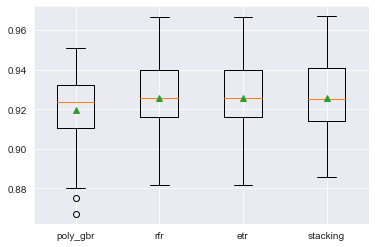

In [64]:
from sklearn.ensemble import StackingRegressor
# get a list of of models to stack

# define the base models

level0 = list()
# Polynomial + Gradient Boosting Regression pipeline
level0.append(('poly_gbr', grid_result_ploy.best_estimator_))
# Random Forest Regressor
level0.append(('rfr', grid_result_etr.best_estimator_))
# Extremely Randomized Trees
level0.append(('etr', grid_result_etr.best_estimator_))
# define meta learner model
level1 = LinearRegression()
# define the stacking ensemble
stack_model = StackingRegressor(estimators=level0, final_estimator=level1, cv=5)


# get a list of models to evaluate
def get_models():
    models_dict = {
                # Polynomial + Gradient Boosting Regression pipeline
                'poly_gbr' : grid_result_ploy.best_estimator_ ,

                # Random Forest Regressor
                'rfr' : grid_result_etr.best_estimator_ ,

                # Extremely Randomized Trees 
                'etr' : grid_result_etr.best_estimator_ ,

                'stacking' : stack_model
              }
    return models_dict
    

# evaluate a given model using cross-validation
def evaluate_model(model, X, y):
    cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=3)
    scores = cross_val_score(model, X, y, scoring='r2', cv=cv, n_jobs=-1, error_score='raise')
    return scores


models = get_models()

# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
    scores = evaluate_model(model, X, y)
    results.append(scores)
    names.append(name)
    print('>%s %.3f (%.3f)' % (name, np.mean(scores), np.std(scores)))
# plot model performance for comparison
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show()    

In [48]:
stack_model_result = stack_model.fit(X_train, y_train)

In [49]:
print(f"Stack/Ensemble of Regression models' Test score: {round(stack_model_result.score(X_test, y_test)*100,2)}")

Stack/Ensemble of Regression models' Test score: 94.26


In [ ]:
# import pickle
# # Stack/Ensemble of Regression models
# stack = stack_model_result.fit(X,y)
# with open("models/stack_regression_models.pkl", 'wb') as file:
#         pickle.dump(stack, file)

# Predicting - Manually inputted Anime info (Not in dataset) 

## Fitting & Saving models

In [50]:

def save_fitted_models(X,y):
    
 
    ##           Fitting complete data to models for predicting               ##
    
    # Multi-Linear Regression
    mlr.fit(X,y)
    with open("models/multi_linear_regression_model.pkl", 'wb') as file:
        pickle.dump(mlr, file)
    # accuracy score
    mlr_score = mlr.score(X_test, y_test)
    print(f"Multiple Linear Regression model's Test score: {round(mlr_score*100,2)}")
        
        
    # Ridge Linear Regression (GridSearch with best parameters)
    ridge = Ridge(**grid_result_rr.best_params_,random_state=3)
    ridge.fit(X,y)
    with open("models/ridge_regression_model.pkl", 'wb') as file:
        pickle.dump(ridge, file)
    # accuracy score
    ridge_score = ridge.score(X_test, y_test)
    print(f"Ridge Regression model's Test score: {round(ridge_score*100,2)}")
    
        
    # Lasso Linear Regression (GridSearch with best parameters)
    lasso = Lasso(**grid_result_lasso.best_params_,random_state=3)
    lasso.fit(X,y)
    with open("models/lasso_regression_model.pkl", 'wb') as file:
        pickle.dump(lasso, file)
    # accuracy score
    lasso_score = lasso.score(X_test, y_test)
    print(f"Lasso Regression model's Test score: {round(lasso_score*100,2)}")
        
        
    # Elastic Net Linear Regression (GridSearch with best parameters)
    e_net = ElasticNet(**grid_result_e_net.best_params_,random_state=3)
    e_net.fit(X,y)
    with open("models/elastic_net_regression_model.pkl", 'wb') as file:
        pickle.dump(e_net, file)
    # accuracy score
    e_net_score = e_net.score(X_test, y_test)
    print(f"Elastic Net Regression model's Test score: {round(e_net_score*100,2)}")
    
    
    # Polynomial Regression (GridSearch with best parameters)
    poly = grid_result_ploy.best_estimator_
    poly.fit(X,y)
    with open("models/polynomial_regression_model.pkl", 'wb') as file:
            pickle.dump(poly, file)
    # accuracy score
    poly_score = grid_result_ploy.best_estimator_.score(X_test, y_test)
    print(f"Polynomial Regression model's Test score: {round(poly_score*100,2)}")
    
        
    # Support Vector Machine for Regression (GridSearch with best parameters)
    svr = SVR(**grid_result_svr.best_params_)
    # X = scaler.fit_transform(X)
    svr.fit(X,y)
    with open("models/support_vector_machine_regression_model.pkl", 'wb') as file:
            pickle.dump(svr, file)
    # accuracy score
    svr_score = svr.score(X_test, y_test)
    print(f"Support Vector Machine for Regression model's Test score: {round(svr_score*100,2)}")
    
    
    # Gradient Boosting Regression (GridSearch with best parameters)
    gbr = GradientBoostingRegressor(**grid_gbr.best_params_,random_state=3)
    gbr.fit(X,y)
    with open("models/gradient_boost_regression_model.pkl", 'wb') as file:
        pickle.dump(gbr, file)
    # accuracy score
    gbr_score = gbr.score(X_test, y_test)
    print(f"Gradient Boosting Regression model's Test score: {round(gbr_score*100,2)}")
    
    
    # Extra Trees Regression (GridSearch with best parameters)
    etr = ExtraTreesRegressor(**grid_etr.best_params_,random_state=3)
    etr.fit(X,y)
    with open("models/extra_trees_regression_model.pkl", 'wb') as file:
        pickle.dump(etr, file)
    # accuracy score
    etr_score = etr.score(X_test, y_test)
    print(f"Extra Trees Regression model's Test score: {round(etr_score*100,2)}")
    
    
    # Random Forest Regression (GridSearch with best parameters)
    rfr = RandomForestRegressor(**grid_rfr.best_params_,random_state=3)
    rfr.fit(X,y)
    with open("models/random_forest_regression_model.pkl", 'wb') as file:
        pickle.dump(rfr, file)
    # accuracy score
    rfr_score = rfr.score(X_test, y_test)
    print(f"Random Forest Regression model's Test score: {round(rfr_score*100,2)}")
    
    
#     # Extreme Gradient Boosting (XGBoost) Regression (GridSearch with best parameters)
#     data_dmatrix = xgb.DMatrix(data=X,label=y)
#     xgbr = grid_result_xgb.best_estimator_
#     xgbr.fit(X,y)
#     with open("models/xgboost_regression_model.pkl", 'wb') as file:
#             pickle.dump(xgbr, file)
#     # accuracy score
#     xgbr_score = xgbr.score(X_test, y_test)
#     print(f"Extreme Gradient Boosting (XGBoost) Regression model's Test score: {round(xgbr_score*100,2)}")

    
    # # Stack/Ensemble of Regression models
    stack = stack_model_result.fit(X,y)
    with open("models/stack_regression_models.pkl", 'wb') as file:
            pickle.dump(stack, file)
    # accuracy score
    stack_score = stack.score(X_test, y_test)
    print(f"Stack/Ensemble of Regression models' Test score: {round(stack_score*100,2)}")
        
        
save_fitted_models(X,y)

Multiple Linear Regression model's Test score: 82.11
Ridge Regression model's Test score: 82.06
Lasso Regression model's Test score: 81.97
Elastic Net Regression model's Test score: 81.96
Polynomial Regression model's Test score: 94.63
Support Vector Machine for Regression model's Test score: 82.74
Gradient Boosting Regression model's Test score: 94.11
Extra Trees Regression model's Test score: 100.0
Random Forest Regression model's Test score: 99.17
Stack/Ensemble of Regression models' Test score: 99.78


## Load & Display models

In [55]:

def anime_predict_score(anime_info):
    
    # function to get string of anime's title from anime's info variables 
    def namestr(obj, namespace):
        name = str([name for name in namespace if namespace[name] is obj]).replace("_"," ").title()
        return name[2:-2]
    title = namestr(anime_info, globals())
    
    
    ##           Fitting complete data to models for predicting               ##
    
    # Multi-Linear Regression
    # load Multi-Linear Regression saved model from pickle file
    with open("models/multi_linear_regression_model.pkl", 'rb') as file:
        mlr = pickle.load(file)
    # print predicted score
    print(f"{title}'s predicted anime score (using Linear Regression) is: {mlr.predict(anime_info)}")
    
        
    # Ridge Linear Regression (GridSearch with best parameters)
    # load Ridge Linear Regression saved model from pickle file
    with open("models/ridge_regression_model.pkl", 'rb') as file:
        ridge = pickle.load(file)
    # print predicted score
    print(f"{title}'s predicted anime score (using Ridge Regression) is: {ridge.predict(anime_info)}")
    
        
    # Lasso Linear Regression (GridSearch with best parameters)
    # load Lasso Linear Regression saved model from pickle file
    with open("models/lasso_regression_model.pkl", 'rb') as file:
        lasso = pickle.load(file)
    # print predicted score
    print(f"{title}'s predicted anime score (using Lasso Regression) is: {lasso.predict(anime_info)}")
    
        
    # Elastic Net Linear Regression (GridSearch with best parameters)
    # load Lasso Linear Regression saved model from pickle file
    with open("models/elastic_net_regression_model.pkl", 'rb') as file:
        e_net = pickle.load(file)
    # print predicted score
    print(f"{title}'s predicted anime score (using Elastic Net Regression) is: {e_net.predict(anime_info)}")
    
    
    # Polynomial Regression (GridSearch with best parameters)
    # load Polynomial Regressionn saved model from pickle file
    with open("models/polynomial_regression_model.pkl", 'rb') as file:
        poly = pickle.load(file)
    # print predicted score
    print(f"{title}'s predicted anime score (using Polynomial Regression) is: {poly.predict(anime_info)}")

        
    # Support Vector Machine for Regression (GridSearch with best parameters)
    # load Support Vector Machine for Regression saved model from pickle file
    with open("models/support_vector_machine_regression_model.pkl", 'rb') as file:
        svr = pickle.load(file)
    # print predicted score
    print(f"{title}'s predicted anime score (using Support Vector Machine for Regression) is: {svr.predict(anime_info)}")
    # print(f"{title}'s predicted anime score (using Support Vector Machine for Regression) is: {scaler.transform(svr.predict(anime_info))}")
    
    
    # Gradient Boosting Regression (GridSearch with best parameters)
    # load Gradient Boosting Linear Regression saved model from pickle file
    with open("models/gradient_boost_regression_model.pkl", 'rb') as file:
        gbr = pickle.load(file)
    # print predicted score
    print(f"{title}'s predicted anime score (using Gradient Boosting Regression) is: {gbr.predict(anime_info)}")
    
    
    # Extra Trees Regression (GridSearch with best parameters)
    # load Extra Trees Regression saved model from pickle file
    with open("models/extra_trees_regression_model.pkl", 'rb') as file:
        etr = pickle.load(file)
    # print predicted score
    print(f"{title}'s predicted anime score (using Extra Trees Regression) is: {etr.predict(anime_info)}")
        
        
    # Random Forest Regression (GridSearch with best parameters)
    # load Random Forest Regression saved model from pickle file
    with open("models/random_forest_regression_model.pkl", 'rb') as file:
        rfr = pickle.load(file)
    # print predicted score
    print(f"{title}'s predicted anime score (using Random Forest Regression) is: {rfr.predict(anime_info)}")
    
    
#     # Extreme Gradient Boosting (XGBoost) Regression (GridSearch with best parameters)
#     # load XGBoost Regression saved model from pickle file
    
#     predict_dmatrix = xgb.DMatrix(data=pd.DataFrame(anime_info,columns=list(X.columns)),label=y)
#     with open("models/xgboost_regression_model.pkl", 'rb') as file:
#         xgbr = pickle.load(file)
#     # print predicted score
#     print(f"{title}'s predicted anime score (using Extreme Gradient Boosting (XGBoost) Regression) is: {xgbr.predict(predict_dmatrix)}")
    
    
    # Stack/Ensemble of Regression models
    # load Stack/Ensemble of Regression saved model from pickle file
    with open("models/stack_regression_models.pkl", 'rb') as file:
        stack = pickle.load(file)
    # print predicted score
    print(f"{title}'s predicted anime score (using Stack/Ensemble of Regression) is: {stack.predict(anime_info)}")
    
    
    
    
    ##           display image of actual score from myAnimelist.com           ##
    
    print('\n\nScreenshot taken from myAnimelist.com of the actual score')
    img = plt.imread(f'images/{title}.jpg')
    plt.figure(figsize = (8.75,10))
    plt.imshow(img)

### running anime Vinland Saga's information through my model

Vinland Saga's predicted anime score (using Linear Regression) is: [8.61226367]
Vinland Saga's predicted anime score (using Ridge Regression) is: [8.62409607]
Vinland Saga's predicted anime score (using Lasso Regression) is: [8.63575069]
Vinland Saga's predicted anime score (using Elastic Net Regression) is: [8.63557022]
Vinland Saga's predicted anime score (using Polynomial Regression) is: [8.73619257]
Vinland Saga's predicted anime score (using Support Vector Machine for Regression) is: [8.42393329]
Vinland Saga's predicted anime score (using Gradient Boosting Regression) is: [8.73881262]
Vinland Saga's predicted anime score (using Extra Trees Regression) is: [8.73625]
Vinland Saga's predicted anime score (using Random Forest Regression) is: [8.74125]
Vinland Saga's predicted anime score (using Stack/Ensemble of Regression) is: [8.75589755]


Screenshot taken from myAnimelist.com of the actual score


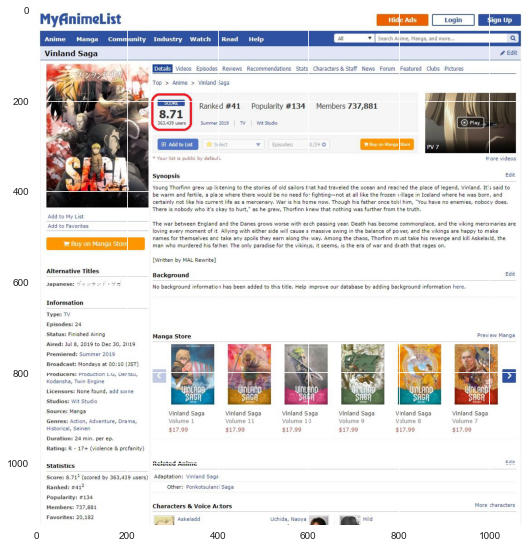

In [56]:
vinland_saga = [[5,6,24,4,363439,41,134,737881,20182,24.0,2019]]

anime_predict_score(vinland_saga)

### running anime Demon Slayer's information through my model

Demon Slayer's predicted anime score (using Linear Regression) is: [9.15225487]
Demon Slayer's predicted anime score (using Ridge Regression) is: [9.15278808]
Demon Slayer's predicted anime score (using Lasso Regression) is: [9.16215605]
Demon Slayer's predicted anime score (using Elastic Net Regression) is: [9.16019189]
Demon Slayer's predicted anime score (using Polynomial Regression) is: [8.62533034]
Demon Slayer's predicted anime score (using Support Vector Machine for Regression) is: [14.89469976]
Demon Slayer's predicted anime score (using Gradient Boosting Regression) is: [8.62710439]
Demon Slayer's predicted anime score (using Extra Trees Regression) is: [8.63515]
Demon Slayer's predicted anime score (using Random Forest Regression) is: [8.63945]
Demon Slayer's predicted anime score (using Stack/Ensemble of Regression) is: [8.65140888]


Screenshot taken from myAnimelist.com of the actual score


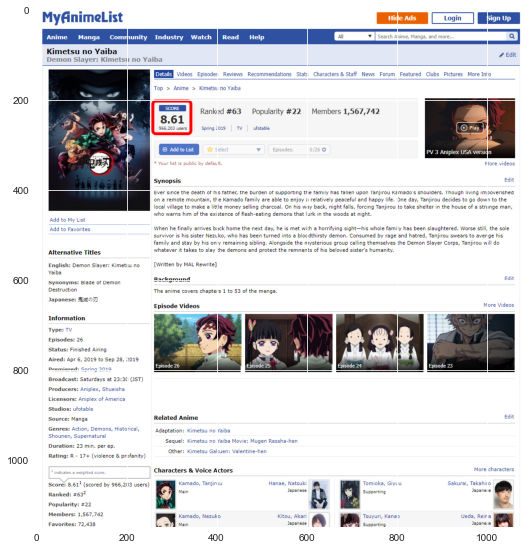

In [57]:
demon_slayer = [[5,6,26,4,966203,63,22,1567326,72436,23.0,2019]]

anime_predict_score(demon_slayer)

### running anime Dororo's information through my model

Dororo's predicted anime score (using Linear Regression) is: [8.51063457]
Dororo's predicted anime score (using Ridge Regression) is: [8.52627244]
Dororo's predicted anime score (using Lasso Regression) is: [8.53905868]
Dororo's predicted anime score (using Elastic Net Regression) is: [8.53935827]
Dororo's predicted anime score (using Polynomial Regression) is: [8.21881865]
Dororo's predicted anime score (using Support Vector Machine for Regression) is: [8.35045708]
Dororo's predicted anime score (using Gradient Boosting Regression) is: [8.19505827]
Dororo's predicted anime score (using Extra Trees Regression) is: [8.19205]
Dororo's predicted anime score (using Random Forest Regression) is: [8.1901]
Dororo's predicted anime score (using Stack/Ensemble of Regression) is: [8.210283]


Screenshot taken from myAnimelist.com of the actual score


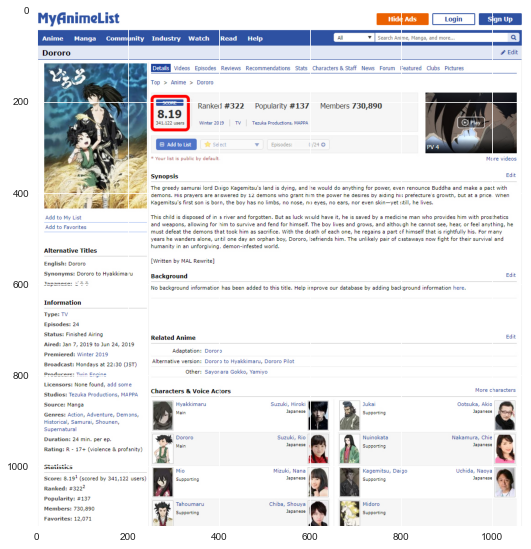

In [58]:
dororo = [[5,6,24,4,341122,322,137,730890,12071,24.0,2019]]

anime_predict_score(dororo)

### running anime Attack on Titan: Season 3's information through my model

Attack On Titan Season 3's predicted anime score (using Linear Regression) is: [8.46352116]
Attack On Titan Season 3's predicted anime score (using Ridge Regression) is: [8.46640008]
Attack On Titan Season 3's predicted anime score (using Lasso Regression) is: [8.47722362]
Attack On Titan Season 3's predicted anime score (using Elastic Net Regression) is: [8.47498642]
Attack On Titan Season 3's predicted anime score (using Polynomial Regression) is: [8.62271278]
Attack On Titan Season 3's predicted anime score (using Support Vector Machine for Regression) is: [9.86057925]
Attack On Titan Season 3's predicted anime score (using Gradient Boosting Regression) is: [8.61333427]
Attack On Titan Season 3's predicted anime score (using Extra Trees Regression) is: [8.6296]
Attack On Titan Season 3's predicted anime score (using Random Forest Regression) is: [8.6322]
Attack On Titan Season 3's predicted anime score (using Stack/Ensemble of Regression) is: [8.64640809]


Screenshot taken from myA

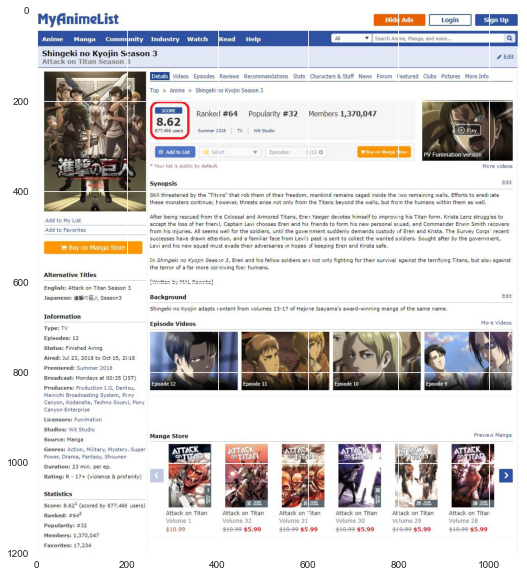

In [59]:
Attack_on_Titan_season_3 = [[5,6,12,4,877466,64,32,1370047,17234,23.0,2018]]

anime_predict_score(Attack_on_Titan_season_3)

### running anime My Hero Academia: Season 3's information through my model

My Hero Season 3's predicted anime score (using Linear Regression) is: [8.45110939]
My Hero Season 3's predicted anime score (using Ridge Regression) is: [8.45385158]
My Hero Season 3's predicted anime score (using Lasso Regression) is: [8.46245661]
My Hero Season 3's predicted anime score (using Elastic Net Regression) is: [8.46108584]
My Hero Season 3's predicted anime score (using Polynomial Regression) is: [8.21580291]
My Hero Season 3's predicted anime score (using Support Vector Machine for Regression) is: [10.50129154]
My Hero Season 3's predicted anime score (using Gradient Boosting Regression) is: [8.21476007]
My Hero Season 3's predicted anime score (using Extra Trees Regression) is: [8.2181]
My Hero Season 3's predicted anime score (using Random Forest Regression) is: [8.21995]
My Hero Season 3's predicted anime score (using Stack/Ensemble of Regression) is: [8.23051149]


Screenshot taken from myAnimelist.com of the actual score


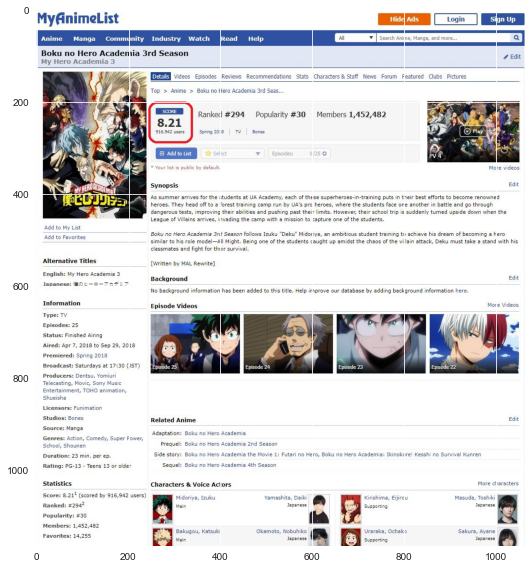

In [60]:
my_hero_season_3 = [[5,6,25,3,916942,294,30,1452482,14255,23.0,2018]]

anime_predict_score(my_hero_season_3)

### running anime Jujutsu Kaisen's information through my model

Jujutsu Kaisen's predicted anime score (using Linear Regression) is: [9.03151218]
Jujutsu Kaisen's predicted anime score (using Ridge Regression) is: [9.05049886]
Jujutsu Kaisen's predicted anime score (using Lasso Regression) is: [9.0662274]
Jujutsu Kaisen's predicted anime score (using Elastic Net Regression) is: [9.06647776]
Jujutsu Kaisen's predicted anime score (using Polynomial Regression) is: [8.83726951]
Jujutsu Kaisen's predicted anime score (using Support Vector Machine for Regression) is: [9.20692269]
Jujutsu Kaisen's predicted anime score (using Gradient Boosting Regression) is: [8.83869741]
Jujutsu Kaisen's predicted anime score (using Extra Trees Regression) is: [8.8269]
Jujutsu Kaisen's predicted anime score (using Random Forest Regression) is: [8.8429]
Jujutsu Kaisen's predicted anime score (using Stack/Ensemble of Regression) is: [8.84994076]


Screenshot taken from myAnimelist.com of the actual score


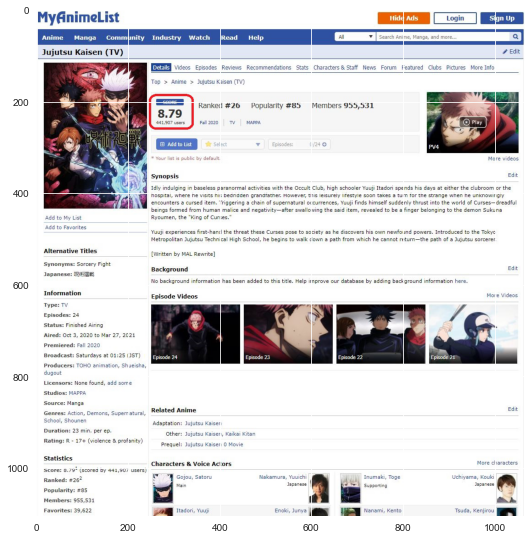

In [61]:
jujutsu_kaisen = [[5,6,24,4,441907,26,85,955531,39622,23.0,2020]]

anime_predict_score(jujutsu_kaisen)

### running anime Mob Psycho 100: Season 2's information through my model

Mob Psycho 100 Season 2's predicted anime score (using Linear Regression) is: [8.47365441]
Mob Psycho 100 Season 2's predicted anime score (using Ridge Regression) is: [8.47442491]
Mob Psycho 100 Season 2's predicted anime score (using Lasso Regression) is: [8.49347738]
Mob Psycho 100 Season 2's predicted anime score (using Elastic Net Regression) is: [8.49180144]
Mob Psycho 100 Season 2's predicted anime score (using Polynomial Regression) is: [8.8761218]
Mob Psycho 100 Season 2's predicted anime score (using Support Vector Machine for Regression) is: [8.5602931]
Mob Psycho 100 Season 2's predicted anime score (using Gradient Boosting Regression) is: [8.86896958]
Mob Psycho 100 Season 2's predicted anime score (using Extra Trees Regression) is: [8.8836]
Mob Psycho 100 Season 2's predicted anime score (using Random Forest Regression) is: [8.89505]
Mob Psycho 100 Season 2's predicted anime score (using Stack/Ensemble of Regression) is: [8.90359723]


Screenshot taken from myAnimelist.co

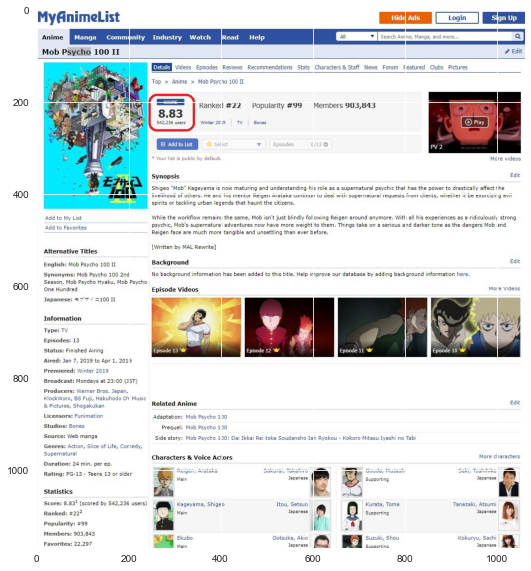

In [62]:
mob_psycho_100_season_2 = [[5,14,13,3,542236,22,99,903843,22297,24.0,2019]]

anime_predict_score(mob_psycho_100_season_2)